# PCA From Scratch On Iris Dataset

## About Iris Dataset

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

## Objective

Implement PCA from scratch on iris dataset and compare it with PCA of sklearn

## Data Preprocessing

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [57]:
iris = pd.read_csv('Iris.csv')
print(iris.shape)
iris.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
#droping the target column
target = iris['Species']
data_x = iris.iloc[:,:-1]

In [59]:
data_x.drop(columns='Id',axis=1,inplace=True)
data_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## PCA Implementation from Scratch

### Step 1: Normalize the data so that whole data will be in single scale

In [34]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data = scale.fit_transform(data_x.values)

In [35]:
data.shape

(150, 4)

### Step2 :  Generate a Covariance matrix

In [36]:
df_matrix = np.asmatrix(data)
print(df_matrix.shape)


(150, 4)


In [37]:
covar_matrix = np.cov(df_matrix.T)
print(covar_matrix.shape)

(4, 4)


Observation - Over covariance matrix will be of 4*4 dimension

### Step3 : Compute eigen values and eigen vectors

Now, let us find the eigen values and eigen vectors of the covariance matrix . This is also called an eigen decomposition. The eigen values tell us the variance in the data set and eigen vectors tell us the corresponding direction of the variance.

In [38]:
eigvalues, eigvectors = np.linalg.eig(covar_matrix)

In [39]:
print(eigvalues)

[2.93035378 0.92740362 0.14834223 0.02074601]


In [41]:
print(eigvectors)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Step4: Select top k eigen values and corresponding eigen vectors

Suppose we want top 2 features.As we have the top 2 eigen vectors and the original matrix with us, its time to form the new data set with reduced k-dimensions (here k=2). PCA being a linear technique, it forms linear equation between the old data set and new data set.

new data set =dot product([old data set],[eigen vector] )

In [68]:
top2eig = eigvectors[:,0:2]
top2eig

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

### Step5: Transforming data

In [69]:
new_data = data_x.dot(top2eig) 

In [97]:
print(new_data.shape)
new_data.head()

(150, 2)


,0,1
0,2.669231,-5.180887
1,2.696434,-4.643645
2,2.481163,-4.752183
3,2.571512,-4.626615
4,2.590658,-5.236211


In [89]:
#creating a new dataframe including target
new_df = pd.DataFrame(np.hstack((new_data,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])

In [91]:
new_df.head()

,1st_component,2nd_component,Species
0,2.66923,-5.18089,Iris-setosa
1,2.69643,-4.64365,Iris-setosa
2,2.48116,-4.75218,Iris-setosa
3,2.57151,-4.62661,Iris-setosa
4,2.59066,-5.23621,Iris-setosa


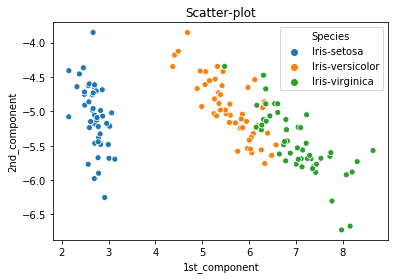

In [105]:
#plotting data
sns.scatterplot(new_df['1st_component'],new_df['2nd_component'],hue=new_df['Species'])
plt.title('Scatter-plot')
plt.show()

# PCA Using Sklearn

In [114]:
pca  = PCA(n_components=2)
#here data is scaled data that we did earlier using standard scalar
pca_components = pca.fit_transform(data)
print(pca_components.shape)

(150, 2)


Here pca_components will give the result obtained by dot product of our data and matrix of top 2 eigen vectors

In [115]:
#creating a new dataframe including target
new_df_pca = pd.DataFrame(np.hstack((pca_components,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])

In [116]:
new_df_pca.head()

,1st_component,2nd_component,Species
0,-2.26454,0.505704,Iris-setosa
1,-2.08643,-0.655405,Iris-setosa
2,-2.36795,-0.318477,Iris-setosa
3,-2.3042,-0.575368,Iris-setosa
4,-2.38878,0.674767,Iris-setosa


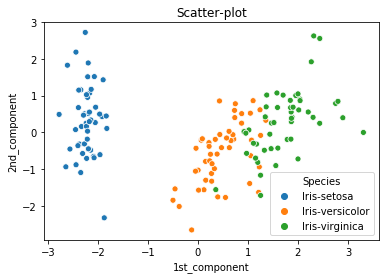

In [117]:
#plotting data
sns.scatterplot(new_df_pca['1st_component'],new_df_pca['2nd_component'],hue=new_df_pca['Species'])
plt.title('Scatter-plot')
plt.show()

# Conclusion

We can see that both of them give almost similar results.